# Data analysis final project - Diamond

## Load and Explore the Dataset

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
diamonds = pd.read_csv("C:\\Users\\adria\\OneDrive\\Desktop\\Diamonds\\Diamonds\\diamonds.csv")

# Display the first few rows of the dataset
print(diamonds.head())

# Basic statistics of the dataset
print(diamonds.describe())


   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000   

## Data Cleaning

In [21]:
# Check for missing values
print(diamonds.isnull().sum())

# Ensure no infinite values
print(diamonds.isin([float('inf'), float('-inf')]).sum())



Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


## Feature Selection

In [22]:
# Convert categorical features to numerical
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

# Check if the mappings have already been applied to avoid repeated mapping
if diamonds['cut'].dtype == 'O':  # If the dtype is object, the mapping hasn't been applied yet
    diamonds['cut'] = diamonds['cut'].map(cut_mapping)
    diamonds['color'] = diamonds['color'].map(color_mapping)
    diamonds['clarity'] = diamonds['clarity'].map(clarity_mapping)

# Select relevant features
features = diamonds[['carat', 'cut', 'color', 'clarity']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## Applying K-Means Clustering

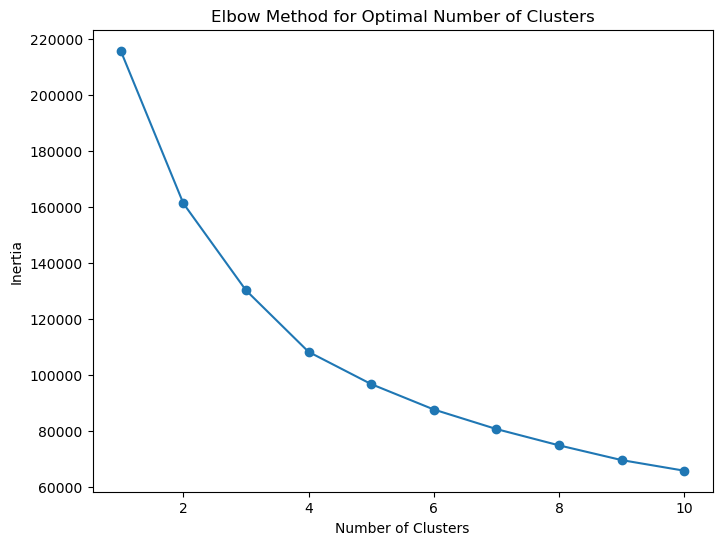

In [23]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K Means with the optimal number of clusters
optimal_clusters = 4  # Assume 4 is optimal based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)  # Set n_init explicitly
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataframe
diamonds['Cluster'] = clusters


## Visualisation of Clusters

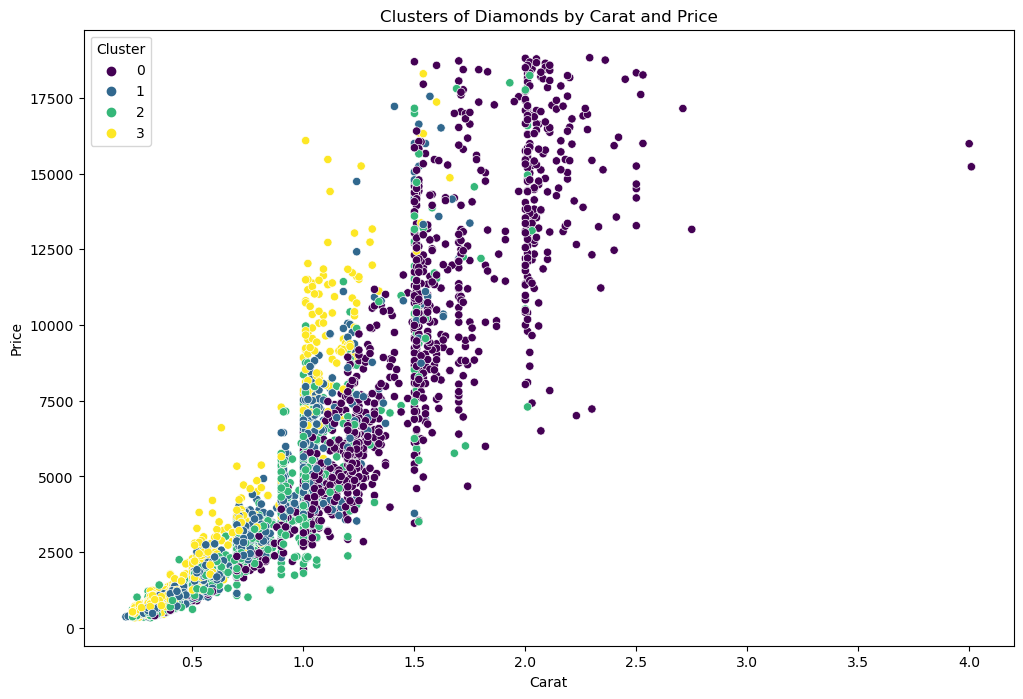

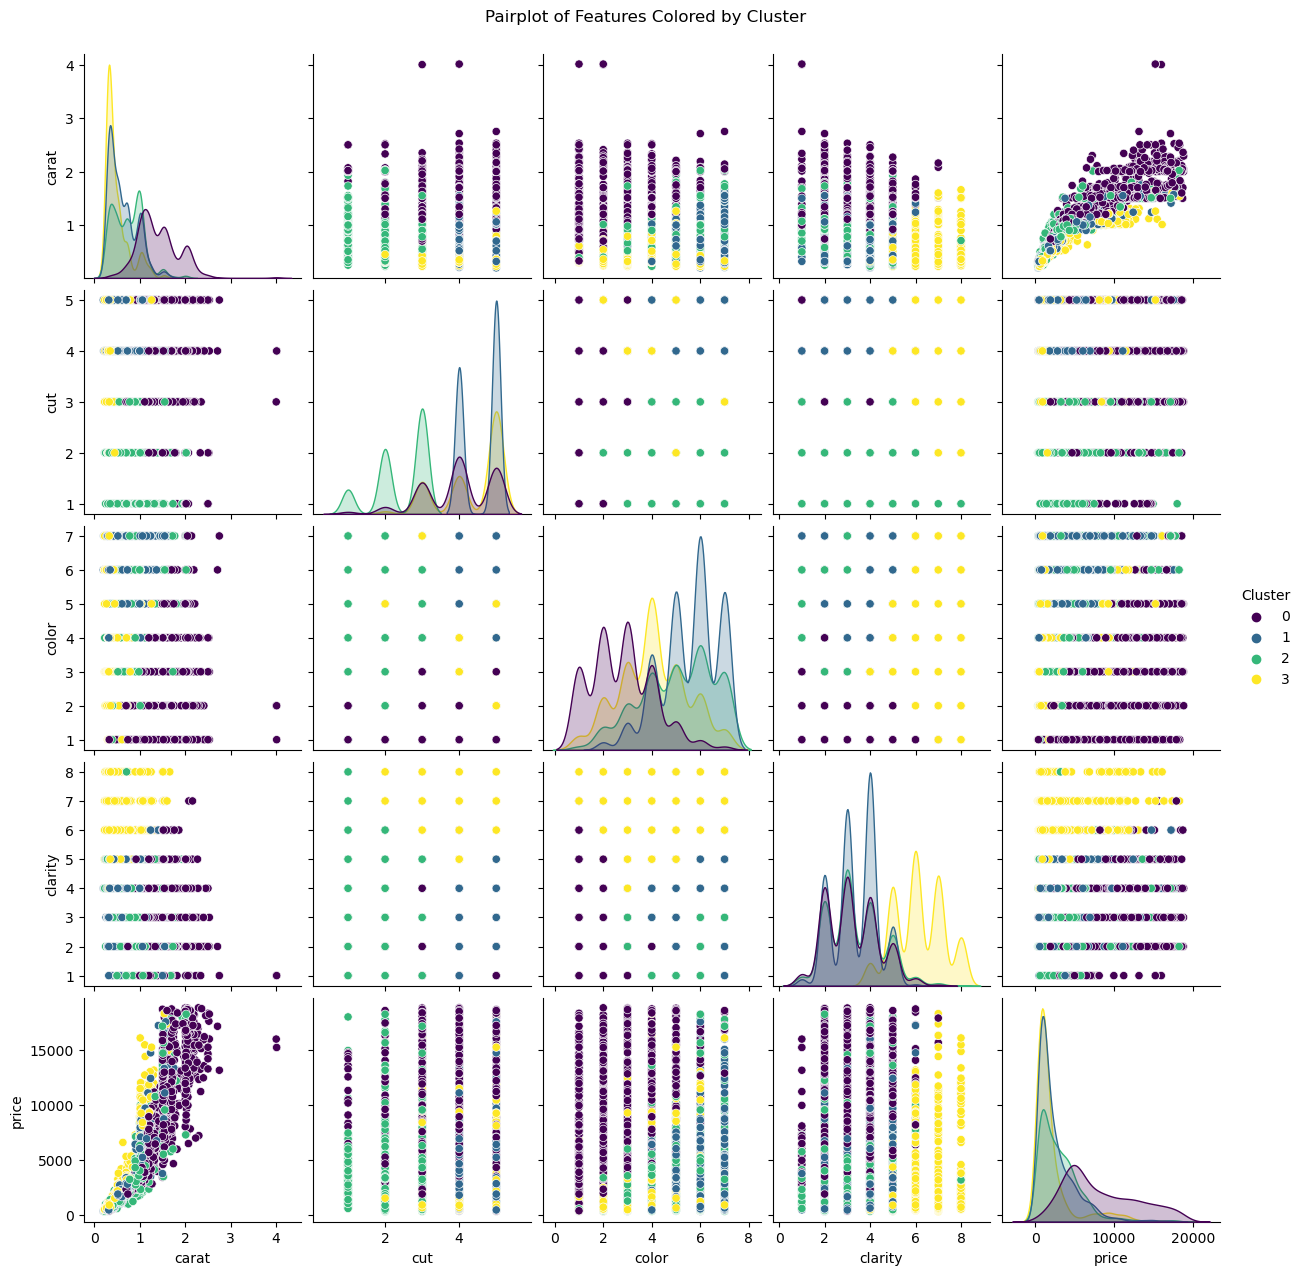

      carat       cut     color   clarity  Cluster
0  1.377722  3.953935  2.736724  3.217850        0
1  0.632673  4.615286  5.544771  3.373208        1
2  0.746265  2.438442  4.987181  3.418608        2
3  0.498324  4.385797  4.104556  6.188632        3


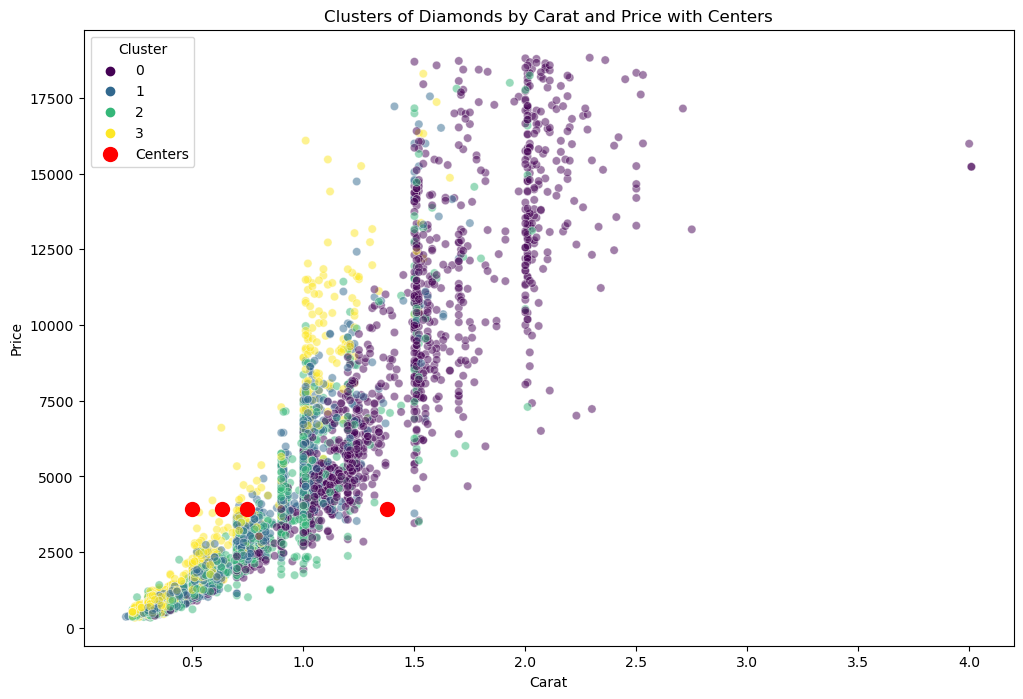

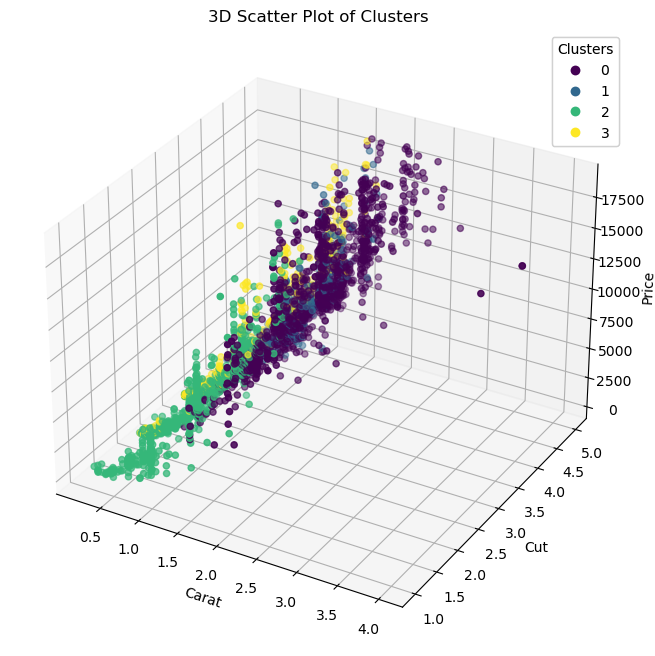

In [24]:
import warnings

# Suppress specific seaborn UserWarnings
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')

# Sample the dataset for quicker plotting
sampled_diamonds = diamonds.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='carat', y='price', hue='Cluster', data=sampled_diamonds, palette='viridis')
plt.title('Clusters of Diamonds by Carat and Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

# Pairplot of Features with Clusters
sns.pairplot(sampled_diamonds[['carat', 'cut', 'color', 'clarity', 'price', 'Cluster']], hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of Features Colored by Cluster', y=1.02)
plt.show()

# Cluster Centers Visualization
# Getting the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Creating a DataFrame for the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['carat', 'cut', 'color', 'clarity'])

# Adding the cluster labels
cluster_centers_df['Cluster'] = range(optimal_clusters)

print(cluster_centers_df)

# Plotting the cluster centers (excluding price)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='carat', y='price', hue='Cluster', data=sampled_diamonds, palette='viridis', alpha=0.5)
plt.scatter(cluster_centers_df['carat'], [diamonds['price'].mean()]*len(cluster_centers_df), c='red', s=100, label='Centers')
plt.title('Clusters of Diamonds by Carat and Price with Centers')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(sampled_diamonds['carat'], sampled_diamonds['cut'], sampled_diamonds['price'], c=sampled_diamonds['Cluster'], cmap='viridis')

ax.set_xlabel('Carat')
ax.set_ylabel('Cut')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot of Clusters')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()
